In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
data_train=pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
data_test=pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Analise do DataFrame;
Vamos chamar as funções:

**.describe():** Analisar se não existe nada de anormal nas colunas, como medias de lotes e etc iguais a 0.

**.info():** Ver quantas linhas não nulas cada coluna tem e se são categorigas ou númericas, informação que usarei logo mais.

**.isnull() e .sort_values(ascending=False):** Ver quais são as 20 primeiras colunas com mais linhas nulas.

In [2]:
data_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
nulos=data_train.isnull().sum().sort_values(ascending=False)[:20]
nulos

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

Text(0.5, 1.0, 'Colunas com muitos valores nulos')

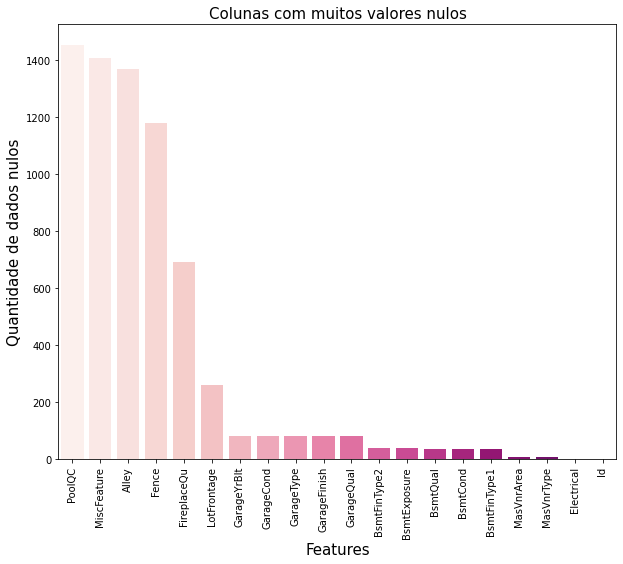

In [5]:
f, ax = plt.subplots(figsize=(10, 8))
plt.xticks(rotation='90')
sns.barplot(x=nulos.index, y=nulos, palette='RdPu')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Quantidade de dados nulos', fontsize=15)
plt.title('Colunas com muitos valores nulos', fontsize=15)

As colunas com muitos valores nulos devem ser retiradas pois não vai me ajudar a treinar meu modelo.

# Correlação dos dados com SalePrice

<AxesSubplot:>

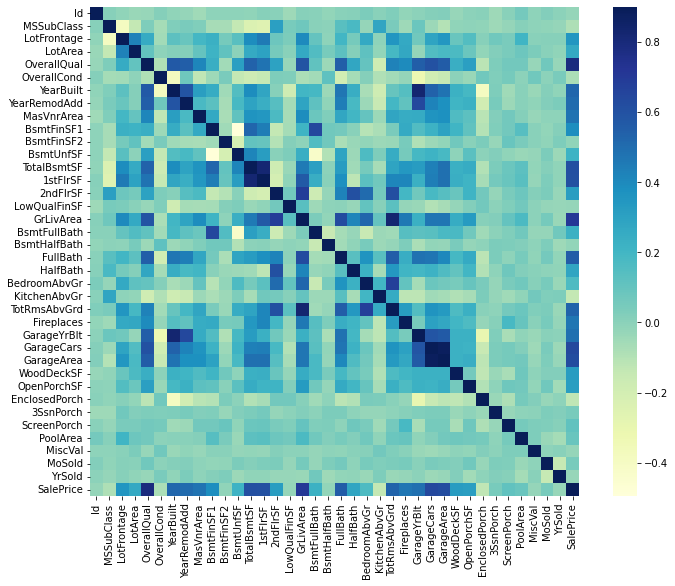

In [6]:
corr = data_train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr, cmap="YlGnBu", vmax=0.9, square=True)

As colunas sem correlação com SalePrice devem ser retiradas dos dataframes também, pois não vão ajudar no treinamento. Para identificalas basta olhar a coluna SalePrice, no eixo x, e no eixo y você encontrara as mesmas colunas, então onde estiver muito claro é porque tem pouca relação e se estiver muito escuro é porque tem muita relação, por exemplo, em GrLivArea existe muita relação com SalePrice, está muito azul, sendo assim lá na frente devo analisar essa coluna melhor.

In [7]:
df_train=data_train.drop(['Id','Alley','PoolQC','Fence','MiscFeature','SaleType','SaleCondition','Condition1','Condition2','YearRemodAdd','Exterior2nd','Exterior1st','FireplaceQu'], axis=1)
df_test=data_test.drop(['Id','Alley','PoolQC','Fence','MiscFeature','SaleType','SaleCondition','Condition1','Condition2','YearRemodAdd','Exterior2nd','Exterior1st','FireplaceQu'], axis=1)

# Substituindo valores nulos
Para as colunas que contem menos valores nulos o mais adequado, ao meu ver, é substituilos pela mediana e valor mais frequente usando a função **.fillna()**. Porque isso vai fazer com que meu treinamento fique mais preciso, pois os valores nulos são poucos e não vão fugir tanto da realidade. Por exemplo, se eu substituir os dados nulos de MasVnrType ou Electrical, colunas com 8 e 1 dados nulos, pelo dado mais frequente existe uma chance boa de que esses valores faltantes coincidam com o substituto. Outro exemplo é se em BsmtFinType2, coluna com apenas 38 valores nulos, os valores nulos fossem substituidos por um dado único, estatisticamente, a chance de que esses dados faltantes coincidiriam com esse dado que apareceu apenas 1 vez em toda coluna iria ser muito baixa, por isso usei o dado mais frequente.

In [8]:
LotFrontage = df_train.LotFrontage.median()
df_train.fillna(LotFrontage, inplace=True)
df_train.LotFrontage.isnull().sum()

0

In [9]:
GarageType = df_train['GarageType'].value_counts()[0]
df_train.fillna(GarageType, inplace=True)
df_train.GarageType.isnull().sum()

0

In [10]:
GarageCond = df_train['GarageCond'].value_counts()[0]
df_train.fillna(GarageCond, inplace=True)
df_train.GarageCond.isnull().sum()

0

In [11]:
GarageYrBlt = df_train.GarageYrBlt.median()
df_train.fillna(GarageYrBlt, inplace=True)
df_train.GarageYrBlt.isnull().sum()

0

In [12]:
GarageFinish = df_train['GarageFinish'].value_counts()[0]
df_train.fillna(GarageFinish, inplace=True)
df_train.GarageFinish.isnull().sum()

0

In [13]:
BsmtExposure = df_train['BsmtExposure'].value_counts()[0]
df_train.fillna(BsmtExposure, inplace=True)
df_train.BsmtExposure.isnull().sum()

0

In [14]:
BsmtFinType2 = df_train['BsmtFinType2'].value_counts()[0]
df_train.fillna(BsmtFinType2, inplace=True)
df_train.BsmtFinType2.isnull().sum()

0

In [15]:
BsmtQual = df_train['BsmtQual'].value_counts()[0]
df_train.fillna(BsmtQual, inplace=True)
df_train.BsmtQual.isnull().sum()

0

In [16]:
BsmtFinType1 = df_train['BsmtFinType1'].value_counts()[0]
df_train.fillna(BsmtFinType1, inplace=True)
df_train.BsmtFinType1.isnull().sum()

0

In [17]:
BsmtCond = df_train['BsmtCond'].value_counts()[0]
df_train.fillna(BsmtCond, inplace=True)
df_train.BsmtCond.isnull().sum()

0

In [18]:
MasVnrType = df_train['MasVnrType'].value_counts()[0]
df_train.fillna(MasVnrType, inplace=True)
df_train.MasVnrType.isnull().sum()

0

In [19]:
MasVnrArea =df_train.MasVnrArea.median()
df_train.fillna(MasVnrArea, inplace=True)
df_train.MasVnrArea.isnull().sum()

0

In [20]:
Electrical = df_train['Electrical'].value_counts()[0]
df_train.fillna(Electrical, inplace=True)
df_train.Electrical.isnull().sum()

0

In [21]:
df_train.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,61,0,0,0,0,0,2,2008,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,298,0,0,0,0,0,0,5,2007,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,42,0,0,0,0,0,9,2008,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,35,272,0,0,0,0,2,2006,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,192,84,0,0,0,0,0,12,2008,250000


# Procurando e deletando outliers 
No gráfico de correlação vi que algumas colunas eram muito relacionadas a SalePrice então agora devo melhorar essa relação eliminando essas outliers que vão causar anomalias nos resultados. Vou usar um gráfico pois existem muitas linhas e colunas no dataframe, então só olhando para a tabela fica impossível de encontrar quais são os dados que destoam do geral.

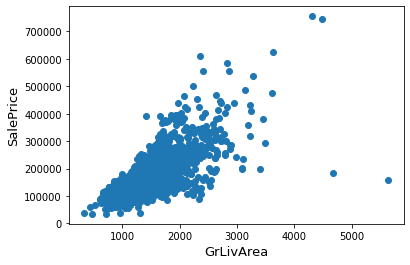

In [22]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

No canto direito existem dois outliers GrLivArea extremamente grandes que são de baixo preço, então seram excluidos para não atrapalharem o treinamento.

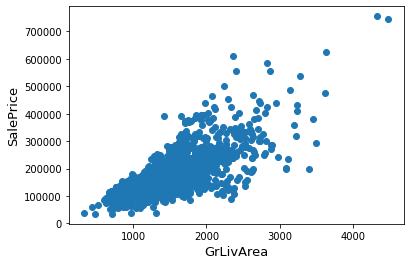

In [23]:
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)
fig, ax = plt.subplots()
ax.scatter(df_train['GrLivArea'], df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

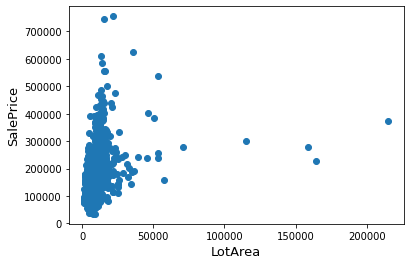

In [24]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['LotArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('LotArea', fontsize=13)
plt.show()

No canto direito existem dois outliers LotArea extremamente grandes que são de baixo preço, então seram excluidos para não atrapalharem o treinamento.

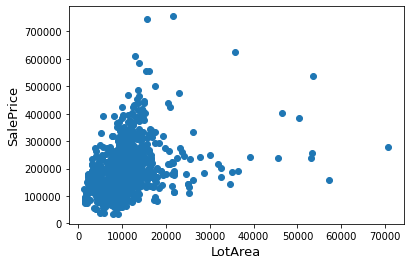

In [25]:
df_train = df_train.drop(df_train[(df_train['LotArea']>100000) & (df_train['SalePrice']<400000)].index)
fig, ax = plt.subplots()
ax.scatter(df_train['LotArea'], df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('LotArea', fontsize=13)
plt.show()

# Criando features 

Como os dados relacionados à área são muito importantes para determinar os preços das casas (todos os dados relacionados à área tem forte relação com SalePrice, isso foi visto no gráfico), vou criar mais algumas colunas como a TotalSF que é a área total do porão, áreas do primeiro e segundo andar de cada casa e Total_Home que é a soma das colunas Overall, se tornando a coluna que resume a qualidade geral da casa.

In [26]:
df_train['TotalSF'] = df_train['TotalBsmtSF'] + df_train['1stFlrSF'] + df_train['2ndFlrSF']

In [27]:
df_train['Total_Home'] = df_train['OverallQual'] + df_train['OverallCond']

# Codificação das features categoricas
Farei a codificação porque as categoricas não podem ser utilizadas em forma de texto, uma vez que os algoritmos compreendem apenas valores numéricos. Também não podemos simplesmente atribuir um valor numérico para cada categoria, uma vez que esse processo, conhecido como ponderação arbitrária, pode criar uma ordenação e pesos para as categorias que não refletem a realidade. Por isso usarei LabelEncoder().

# LabelEncoder()
Label Encoding consiste em converter as classes categóricas em números que as representam (ex: masculino/feminino são convertidos em 0/1. Vou usalo para converter as variáveis restantes que possuem alguma relação de ordem, as categóricas ordinais.

In [28]:
from sklearn.preprocessing import LabelEncoder
cat = [coln for coln in df_train.columns if df_train[coln].nunique() < 10 and df_train[coln].dtype == 'object']
num = [coln for coln in df_train.columns if df_train[coln].dtype in ['float64', 'int64'] and coln not in ['SalePrice']]
features = cat + num
# aplicando o LabelEncoder nas categoricas
for c in cat:
    lbl = LabelEncoder() 
    lbl.fit(list(df_train[c].values)) 
    df_train[c] = lbl.transform(list(df_train[c].values))      
print('Shape df_train: {}'.format(df_train.shape))

Shape df_train: (1454, 70)


Fazendo as mesmas coisas feitas em df_train no df_test.

In [29]:
df_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Y,140,0,0,0,120,0,0,6,2010
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,Y,393,36,0,0,0,0,12500,6,2010
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,Y,212,34,0,0,0,0,0,3,2010
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,Y,360,36,0,0,0,0,0,6,2010
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,Y,0,82,0,0,144,0,0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Y,0,0,0,0,0,0,0,6,2006
1455,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Y,0,24,0,0,0,0,0,4,2006
1456,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Y,474,0,0,0,0,0,0,9,2006
1457,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Y,80,32,0,0,0,0,700,7,2006


In [30]:
LotFrontage = df_test.LotFrontage.median()
df_test.fillna(LotFrontage, inplace=True)
df_test.LotFrontage.isnull().sum()

0

In [31]:
GarageType = df_test['GarageType'].value_counts()[0]
df_test.fillna(GarageType, inplace=True)
df_test.GarageType.isnull().sum()

0

In [32]:
GarageCond = df_test['GarageCond'].value_counts()[0]
df_test.fillna(GarageCond, inplace=True)
df_test.GarageCond.isnull().sum()

0

In [33]:
GarageYrBlt = df_test.GarageYrBlt.median()
df_test.fillna(GarageYrBlt, inplace=True)
df_test.GarageYrBlt.isnull().sum()

0

In [34]:
GarageFinish = df_test['GarageFinish'].value_counts()[0]
df_test.fillna(GarageFinish, inplace=True)
df_test.GarageFinish.isnull().sum()

0

In [35]:
BsmtExposure = df_test['BsmtExposure'].value_counts()[0]
df_test.fillna(BsmtExposure, inplace=True)
df_test.BsmtExposure.isnull().sum()

0

In [36]:
BsmtFinType2 = df_test['BsmtFinType2'].value_counts()[0]
df_test.fillna(BsmtFinType2, inplace=True)
df_test.BsmtFinType2.isnull().sum()

0

In [37]:
BsmtQual = df_test['BsmtQual'].value_counts()[0]
df_test.fillna(BsmtQual, inplace=True)
df_test.BsmtQual.isnull().sum()

0

In [38]:
BsmtFinType1 = df_test['BsmtFinType1'].value_counts()[0]
df_test.fillna(BsmtFinType1, inplace=True)
df_test.BsmtFinType1.isnull().sum()

0

In [39]:
BsmtCond = df_test['BsmtCond'].value_counts()[0]
df_test.fillna(BsmtCond, inplace=True)
df_test.BsmtCond.isnull().sum()

0

In [40]:
MasVnrType = df_test['MasVnrType'].value_counts()[0]
df_test.fillna(MasVnrType, inplace=True)
df_test.MasVnrType.isnull().sum()

0

In [41]:
MasVnrArea = df_test.MasVnrArea.median()
df_test.fillna(MasVnrArea, inplace=True)
df_test.MasVnrArea.isnull().sum()

0

In [42]:
Electrical = df_test['Electrical'].value_counts()[0]
df_test.fillna(Electrical, inplace=True)
df_test.Electrical.isnull().sum()

0

In [43]:
from sklearn.preprocessing import LabelEncoder
cat = [coln for coln in df_test.columns if df_test[coln].nunique() < 10 and df_test[coln].dtype == 'object']
num = [coln for coln in df_test.columns if df_test[coln].dtype in ['float64', 'int64'] and coln not in ['SalePrice']]
features = cat + num
# aplicando o LabelEncoder nas categoricas
for c in cat:
    lbl = LabelEncoder() 
    lbl.fit(list(df_test[c].values)) 
    df_test[c] = lbl.transform(list(df_test[c].values))

# shape        
print('Shape df_test: {}'.format(df_test.shape))

Shape df_test: (1459, 67)


In [44]:
df_test['TotalSF'] = df_test['TotalBsmtSF'] + df_test['1stFlrSF'] + df_test['2ndFlrSF']
df_test['Total_Home'] = df_test['OverallQual'] + df_test['OverallCond']

In [45]:
df_test.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalSF,Total_Home
0,20,3,80.0,11622,1,3,3,1,4,0,...,0,0,0,120,0,0,6,2010,1778.0,11
1,20,4,81.0,14267,1,0,3,1,0,0,...,36,0,0,0,0,12500,6,2010,2658.0,12
2,60,4,74.0,13830,1,0,3,1,4,0,...,34,0,0,0,0,0,3,2010,2557.0,10
3,60,4,78.0,9978,1,0,3,1,4,0,...,36,0,0,0,0,0,6,2010,2530.0,12
4,120,4,43.0,5005,1,0,1,1,4,0,...,82,0,0,144,0,0,1,2010,2560.0,13


Normalização;
> **Box Cox:**
 Formalmente, uma transformação de Box cox é definida como uma forma de transformar variáveis dependentes não normais em nossos dados em uma forma normal, por meio da qual podemos executar muito mais testes do que poderíamos.

> ****Por que usei?:**** Porque os modelos (lineares) amam dados normalmente distribuídos, precisei ver se minhas features númericas eram assimétricas, e elas eram assimétricas, então transformei essas variaveis e as tornei mais normalmente distribuídas.


O Skew das features númericas

In [46]:
from scipy.stats import norm, skew 
skewed_feats = df_train[num].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew em features numericas: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew em features numericas: 



,Skew
MiscVal,24.469277
PoolArea,15.910404
3SsnPorch,10.272009
LowQualFinSF,8.982890
KitchenAbvGr,4.473226
BsmtFinSF2,4.279205
BsmtHalfBath,4.121397
ScreenPorch,4.108107
LotArea,3.932476
EnclosedPorch,3.078561


In [47]:
skewness = skewness[abs(skewness) > 0.75]
print("Há {} dados numéricos distorcidos na transformação Box Cox".format(skewness.shape[0]))

Há 35 dados numéricos distorcidos na transformação Box Cox


 Usarei a função scipy boxcox1p estabilizando feature por feature usando um for que calcula a transformação Box-Cox de 1+x.

In [48]:
print("aqui estão {} dados numéricos distorcidos para transformação de Box Cox".format(skewness.shape[0]))
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    df_train[feat] = boxcox1p(df_train[feat], lam)

aqui estão 35 dados numéricos distorcidos para transformação de Box Cox


In [49]:
y_train=df_train['SalePrice']
X_train = df_train.drop(columns=['SalePrice'])
X_train = pd.get_dummies(X_train)
print(X_train.shape)

(1454, 93)


In [50]:
from scipy.stats import norm, skew 
skewed_feats = df_test[num].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew em features numericas: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew em features numericas: 



,Skew
GarageCars,28.780996
BsmtHalfBath,26.542535
BsmtFullBath,25.184773
PoolArea,20.176117
MiscVal,20.054543
LowQualFinSF,16.150628
3SsnPorch,12.511336
EnclosedPorch,4.664371
KitchenAbvGr,4.074860
BsmtFinSF2,4.038375


In [51]:
skewness = skewness[abs(skewness) > 0.75]
print("Há {} dados numéricos distorcidos na transformação Box Cox".format(skewness.shape[0]))

Há 35 dados numéricos distorcidos na transformação Box Cox


In [52]:
skewness = skewness[abs(skewness) > 0.75]
print("aqui estão {} dados numéricos distorcidos para transformação de Box Cox".format(skewness.shape[0]))
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    df_test[feat] = boxcox1p(df_test[feat], lam)

aqui estão 35 dados numéricos distorcidos para transformação de Box Cox


In [53]:
X_test = df_test
X_test = pd.get_dummies(X_test)
print(X_test.shape)

(1459, 93)


# O que é, e por que escolhi usar o XGBoost;
> **O que é?**
O XGBoost é um algoritmo de aprendizado de máquina, baseado em árvore de decisão e que utiliza uma estrutura de Gradient boosting. Basicamente, o XGBoost aprimora a estrutura básica do GBM por meio da otimização de sistemas e aprimoramentos algorítmicos. Vale citar que desde a sua introdução, este algoritmo tem sido o mais vitorioso no Kaggle, além disso, também tem sido utilizado em várias aplicações de ponta na indústria.

# 
> **Por que ele?** Escolhi trabalhar com o XGBoost porque estou trabalhando com dados estruturados/tabulares e os algoritmos baseados em árvore de decisão são considerados os melhores para o meu caso, pois a utilização de um algoritmo depende de diversos fatores, como custo computacional, prazo de implementação e acurácia.

In [54]:
from xgboost import XGBRegressor
xgb_clf = XGBRegressor(n_estimators=1000, learning_rate=0.05)
xgb_clf.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

# Validação cruzada ou em inglês cross validation;
Utilizei o **cross_val_score()** porque se eu alterar a posição dos elementos, tenho um conjunto com dados completamente diferentes. Isso ocorre pois prendemos o algoritmo na sequência que os dados foram apresentados, isto é, a posição de cada elemento importa para o resultado do algoritmo. É por isso que quando altero o tamanho de treino o meu algoritmo muda o resultado também.
O que **cross_val_score()** faz é separar uma parte dos dados para treino e teste criando várias combinações diferentes. Dessa forma cada combinação me da um resultado e, com esse resultado, vejo o quão bom foi o meu algoritmo.
Dessa maneira, podemos fazer k combinações cruzando o meu conjunto de dados. Cada um dos cruzamentos, nos retorna um valor que é a taxa de acerto daquela combinação.
Assim validamos meus dados cruzando várias combinações possíveis.




In [55]:
from sklearn.model_selection import cross_val_score
xgb_clf_cv = cross_val_score(xgb_clf,X_train, y_train, cv=10, )
print(xgb_clf_cv.mean()) 

0.9105472661601672


In [56]:
xgb_clf = XGBRegressor(n_estimators=1000, learning_rate=0.05)
xgb_clf.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [57]:
from sklearn.metrics import classification_report
xgb_predictions_test = xgb_clf.predict(X_test)
xgb_predictions_test

array([127045.51, 169444.83, 185371.6 , ..., 165526.58, 105832.27,
       205188.34], dtype=float32)

In [58]:
xgb_predictions_test.shape

(1459,)

In [59]:
submission = pd.DataFrame({
        "Id": data_test["Id"],
        "SalePrice": xgb_predictions_test
    })

submission.to_csv("kaggleXGB_HousePrices.csv", index=False)

# Motivo do erro maior na predição;
Overfitting, ao inves de aprender um modelo quadratico que tem um baixo erro em relação ao geral meu modelo decorou os dados da competição.

>  ****O que é Overfitting?****
A variância é um erro de sensibilidade para pequenas flutuações no conjunto de treinamento. Alta variância pode fazer com que um algoritmo modele o ruído aleatório nos dados de treinamento, em vez das saídas pretendidas. A este erro dá-se o nome de overfitting.
Um cenário de overfitting ocorre quando, nos dados de treino, o modelo tem um desempenho excelente, porém quando utilizamos os dados de teste o resultado é ruim.
Podemos entender que, neste caso, o modelo aprendeu tão bem as relações existentes no treino, que acabou apenas decorando o que deveria ser feito, e ao receber as informações das variáveis preditoras nos dados de teste, o modelo tenta aplicar as mesmas regras decoradas, porém com dados diferentes esta regra não tem validade, e o desempenho é afetado. É comum ouvirmos que neste cenário o modelo treinado não tem capacidade de generalização.

# Possiveis metodos para melhorar a submissão;
Tratar melhor meus outliers;
> Defini padrões para os meus outliers, mas acho que eu poderia explorar esses dados de maneira metodológicamente mais rigorosa como, por exemplo, usando Critério de Chauvenet ou Teste de Grubbs.
**Motivo:** Posso errar ou deixar passar otliers, imagine uma casa muito grande, com uma área muito grande também, em uma localização ruim, por causa da sua localização, ela pode ser barata e fugir do que o gráfico de releção mostrou, quanto maior a área mais cara é a casa, e isso pode ser aplicado diferentes situações.

 Critério de Chauvenet;
> O teste Chauvenet é utilizado para estabelecer se existe algum valor
aberrante presente na amostra estudada, levando-se em consideração que estes
dados amostrais são referentes a medições que seguem uma distribuição normal. Equacões são feitas sucessivamente, 4 equações exatamente, e esse procedimento deve ser realizado até que todos os valores considerados aberrantes sejam eliminados, ou seja, uma medida pode ser excluída se a probabilidade de se obter o desvio específico da média for inferior a 1 / (2n)

Teste de Grubbs;
> O teste de Grubbs é primeiramente realizado para verificar a existência de
um valor aberrante em cada extremidade do conjunto de dados. Se nesta primeira
análise, um dos dois valores for considerado aberrante, ele é rejeitado, retirado do
conjunto e um novo teste, verificando a existência de um valor aberrante em cada
extremidade do conjunto, é realizado e assim sucessivamente; caso contrário, se
nesta primeira análise, ambos os valores forem aceitos como não aberrantes, o
teste é encerrado e utilizamos o conjunto de dados remanescentes para análise. Se
na segunda análise os dois resultados de uma das extremidades forem
considerados como aberrantes, eles devem ser rejeitados, retirados do conjunto e um
novo teste verificando a existência de dois valores aberrantes em cada extremidade do conjunto é realizado e assim sucessivamente, até que ambos os valores sejam aceitos como não aberrantes.

Model tuning;
> Resumidamente, os algoritmos de machine learning recebem dois tipos de entrada:
dados que são utilizados para treinar o modelo e Hiper parâmetros que são responsáveis pela configuração lógica do algoritmo que está por trás do modelo.
> Gostaria de ter criado uma etapa para refinar meu modelo, ficar alternando valores de padrão manualmente ou usando ****algoritmos de tuning****: um algoritmo pode testar diferentes cenários para mim, existem duas classes de algoritmos de tuning, o ****Grid search:**** define exatamente quais são os valores dos parâmetros que serão testados.
****Random search:**** valores aleatórios de parâmetros são testados. **Motivo:** quando fiz o plot do meu fit foi mostrado todos os valores que meu modelo usou, como 0.5 para um score, e cada uma dessas coisas tem um significado, por exemplo, quando usei o máximo de arvores 6, talvez se eu usasse 7 meu erro diminuiria. Acredito que poderia explorar esses parâmetros um pouco melhor em uma etapa de validação de maneira que fizessem sentido para o meu contexto.

****Por que não fiz?****
São metodos trabalhosos, pelo menos para mim que comecei agora com IA, e acredito que os modelos devem se ajustar a situações de tempo, experiência, taxa de erro que busco e etc.